In [55]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt

In [56]:
# merge hadicappers' history bets into one dataframe
source_dir = '/Users/jzuniga/Downloads/HCData/'
names = [
    'Smart',
    'Bartley',
    'Aronson',
    'Burns',
    'Barone', # not in Ji's original list
    'Bitler',
    'Power',
    'Ross',
    'Diamond',
    'Trapp',
    'Sports',
    'Eddie',
    'Schule',
    'DAmico',
    'Duffy',
    'Thomas',
    'Hunter',
    'Compeau', # not in Ji's original list
    'Syndicate',
    'Lundin',
    'Simulator',
    'Wilson',
    'Monohan',
    'Vinceletti',
    'Rickenbach',
    'Higgs',
    'Nover',
    'Brown',
    'Karpinski',
    'Rogers'
    ]

df = pd.DataFrame()
for i in range(1,31): 
    tmp_df = pd.read_pickle(source_dir + 'HC' + str(i) + '.gz', compression='gzip')
    
    # if you want the last name of the HC, switch to use names array
    #newdf['Handicapper'] = names[i-1]
    tmp_df['Handicapper'] = 'HC'+str(i)
    df = df.append(tmp_df, ignore_index=True)

In [6]:
df.describe()

,League,GameKey,GameTime,Home,Away,Bet,On,Juice,Type,Result,MLBet,MLWinner,Handicapper
count,134880,134880,134880,134880,134880,134880,134880,134880,134880,134880,134880,134880,134880
unique,7,38583,18265,442,450,3,441,387,2,3,3,3,30
top,MLB,2899b2606b2a35f67a4f5aa20443ba44,2017-11-19 13:00:00,WASHINGTON,WASHINGTON,POINT SPREAD,OVER,-110,Premium,Win,,,HC22
freq,39376,36,82,3483,3582,66452,14551,28123,126466,68269,94087,94396,10896
first,NaN,NaN,2013-07-04 19:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-04-11 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


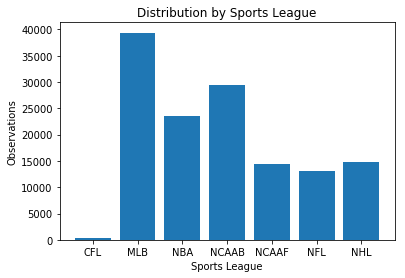

In [57]:
# Distribution according to League
plt.bar(df.sort_values(by='League').League.unique(), df.groupby(['League']).size())
plt.title('Distribution by Sports League')
plt.xlabel('Sports League')
plt.ylabel('Observations')
plt.show()

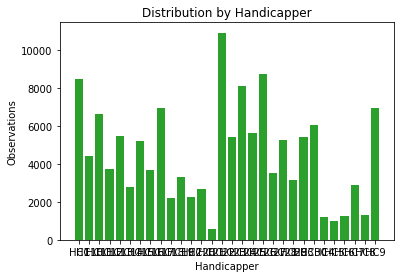

In [33]:
# Distribution by Handicapper
plt.bar(df.sort_values(by='Handicapper').Handicapper.unique(), df.groupby(['Handicapper']).size())
plt.title('Distribution by Handicapper')
plt.xlabel('Handicapper')
plt.ylabel('Observations')
plt.show()

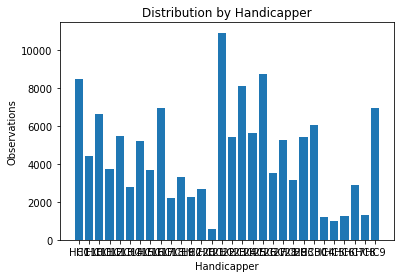

In [59]:
# Distribution by Handicapper
plt.bar(df.sort_values(by='Handicapper').Handicapper.unique(), df.groupby(['Handicapper']).size())
plt.title('Distribution by Handicapper')
plt.xlabel('Handicapper')
plt.ylabel('Observations')
plt.show()

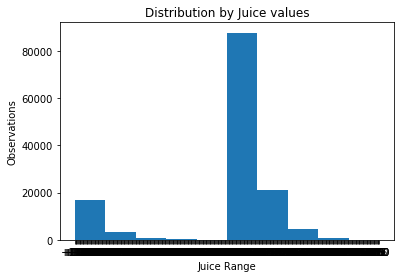

In [43]:
# Distribution by Juice
plt.hist(df['Juice'].dropna().values, bins=10)
plt.xlabel('Juice Range')
plt.ylabel('Observations')
plt.title('Distribution by Juice values')
plt.show()

In [24]:
df.sort_values(by='League').League.unique()

array(['CFL', 'MLB', 'NBA', 'NCAAB', 'NCAAF', 'NFL', 'NHL'], dtype=object)

In [48]:

print("Number of observations: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print("Features available: ", df.columns)

Number of observations:  134880
Number of columns:  13
Features available:  Index(['League', 'GameKey', 'GameTime', 'Home', 'Away', 'Bet', 'On', 'Juice',
       'Type', 'Result', 'MLBet', 'MLWinner', 'Handicapper'],
      dtype='object')


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134880 entries, 0 to 134879
Data columns (total 13 columns):
League         134880 non-null object
GameKey        134880 non-null object
GameTime       134880 non-null datetime64[ns]
Home           134880 non-null object
Away           134880 non-null object
Bet            134880 non-null object
On             134880 non-null object
Juice          134880 non-null object
Type           134880 non-null object
Result         134880 non-null object
MLBet          134880 non-null object
MLWinner       134880 non-null object
Handicapper    134880 non-null object
dtypes: datetime64[ns](1), object(12)
memory usage: 13.4+ MB


In [51]:
# Get general characteristics by column
df.describe(include=['object', 'bool'])

,League,GameKey,Home,Away,Bet,On,Juice,Type,Result,MLBet,MLWinner,Handicapper
count,134880,134880,134880,134880,134880,134880,134880,134880,134880,134880,134880,134880
unique,7,38583,442,450,3,441,387,2,3,3,3,30
top,MLB,2899b2606b2a35f67a4f5aa20443ba44,WASHINGTON,WASHINGTON,POINT SPREAD,OVER,-110,Premium,Win,,,HC22
freq,39376,36,3483,3582,66452,14551,28123,126466,68269,94087,94396,10896


In [54]:
# Top Handicapper contributions
h = df.groupby(['Handicapper']).size()
h.sort_values(ascending=False).head()

Handicapper
HC22    10896
HC26     8713
HC1      8437
HC24     8072
HC9      6943
dtype: int64